In [2]:
import sys
sys.path.append('../src')

In [3]:
import mesa
import seaborn as sns
import numpy as np
import pandas as pd

from boltzman import MoneyAgent, MoneyModel

In [5]:
import time
sizes = [10, 20, 50, 100]
agents = [100, 500, 1000, 5000]
iterations = 5
steps = 100

for size in sizes:
    for ag in agents:
        itime = time.time()
        for i in range(iterations):
            model = MoneyModel(ag, size, size)
            for i in range(steps):
                model.step()
        
        ttime = (time.time() - itime) / iterations
        print(f"Size: {size}, Agents: {ag}, Time: {ttime}")

Size: 10, Agents: 100, Time: 0.06341147422790527
Size: 10, Agents: 500, Time: 0.3257631778717041
Size: 10, Agents: 1000, Time: 0.6730024337768554
Size: 10, Agents: 5000, Time: 4.530198860168457
Size: 20, Agents: 100, Time: 0.0705491542816162
Size: 20, Agents: 500, Time: 0.2984454154968262
Size: 20, Agents: 1000, Time: 0.6568503379821777
Size: 20, Agents: 5000, Time: 4.241967439651489
Size: 50, Agents: 100, Time: 0.06482858657836914
Size: 50, Agents: 500, Time: 0.3087768077850342
Size: 50, Agents: 1000, Time: 0.6346638679504395
Size: 50, Agents: 5000, Time: 4.21185302734375
Size: 100, Agents: 100, Time: 0.08746395111083985
Size: 100, Agents: 500, Time: 0.34962477684021
Size: 100, Agents: 1000, Time: 0.6924854278564453
Size: 100, Agents: 5000, Time: 4.238890886306763


In [19]:


params = {"width": 100, "height": 100, "N": 5000}

results = mesa.batch_run(
    MoneyModel,
    parameters=params,
    iterations=20,
    max_steps=100,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,

)

  0%|          | 0/20 [00:00<?, ?it/s]

In [18]:
1/1.1


0.5154639175257733

In [22]:
results_df = pd.DataFrame(results)
results_df.RunId.unique()
display(results_df)

,RunId,iteration,Step,width,height,N,Gini,AgentID,Wealth
0,0,0,0,10,10,5,0.000000,0,1
1,0,0,0,10,10,5,0.000000,1,1
2,0,0,0,10,10,5,0.000000,2,1
3,0,0,0,10,10,5,0.000000,3,1
4,0,0,0,10,10,5,0.000000,4,1
...,...,...,...,...,...,...,...,...,...
671645,132,6,100,10,10,95,0.629584,84,1
671646,132,6,100,10,10,95,0.629584,21,0
671647,132,6,100,10,10,95,0.629584,20,0
671648,132,6,100,10,10,95,0.629584,23,1


In [8]:
results_df = pd.DataFrame(results)
print(results_df.keys())

Index(['RunId', 'iteration', 'Step', 'width', 'height', 'N', 'Gini', 'AgentID',
       'Wealth'],
      dtype='object')


[Text(0.5, 1.0, 'Gini Coefficient over Time'),
 Text(0, 0.5, 'Gini Coefficient')]

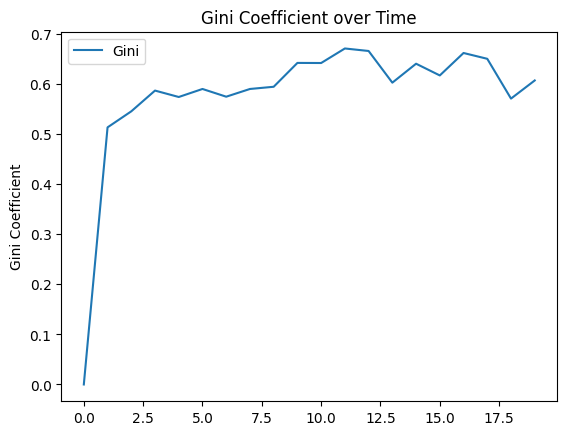

In [7]:
model = MoneyModel(100, 10, 10)
for i in range(20):
    model.step()

gini = model.datacollector.get_model_vars_dataframe()
# Plot the Gini coefficient over time
g = sns.lineplot(data=gini)
g.set(title="Gini Coefficient over Time", ylabel="Gini Coefficient")

NameError: name 'model' is not defined

In [6]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
# agent_wealth

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1
...              ...
19   63            1
     2             2
     93            0
     23            3
     25            3

[2000 rows x 1 columns]

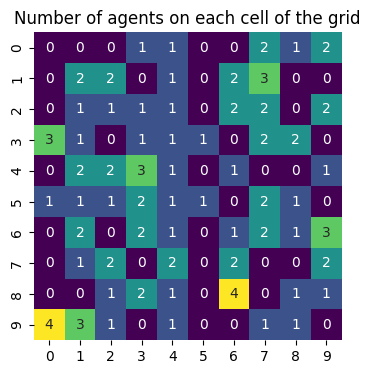

In [4]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter():
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
# Plot using seaborn, with a size of 5x5
g = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=False, square=True)
g.figure.set_size_inches(4, 4)
g.set(title="Number of agents on each cell of the grid");